In [2]:
from transformers import (
    BartTokenizerFast,
    DataCollatorForSeq2Seq,
    keras_callbacks,
    TFAutoModelForSeq2SeqLM,
)
import tensorflow as tf
from datasets import Dataset
import pandas as pd
import numpy as np
from tqdm import tqdm
from datasets import concatenate_datasets
from question_answering.constants import constants
from question_answering.utils import core_qa_utils, generative_qa_utils
from question_answering.paths import generative_qa_paths
from question_answering.keras_callbacks.time_measure_callback import TimeMeasureCallback

In [3]:
df_train, df_val, df_test = core_qa_utils.load_datasets_from_csv(
    generative_qa_paths.python_dataset_dir
)

df_train = pd.concat([df_train, df_val], ignore_index=True)
df_test = np.array_split(df_test, 2)[0]

train_dataset, test_dataset = core_qa_utils.convert_dataframes_to_datasets(
    [df_train, df_test]
)

c:\Users\Artur\.conda\envs\question_answering\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [4]:
train_dataset

Dataset({
    features: ['index', 'questions', 'answers', 'code', 'original_code'],
    num_rows: 63080
})

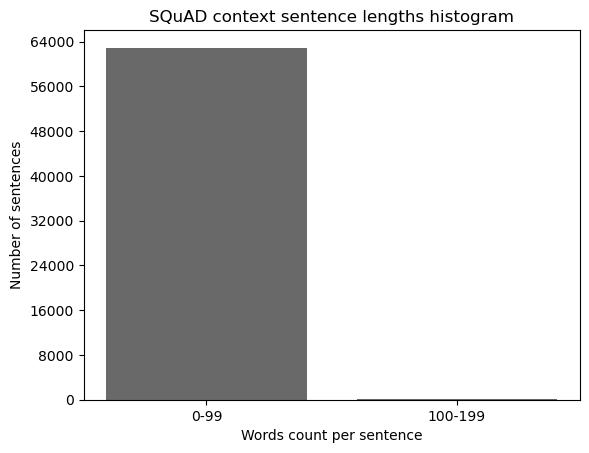

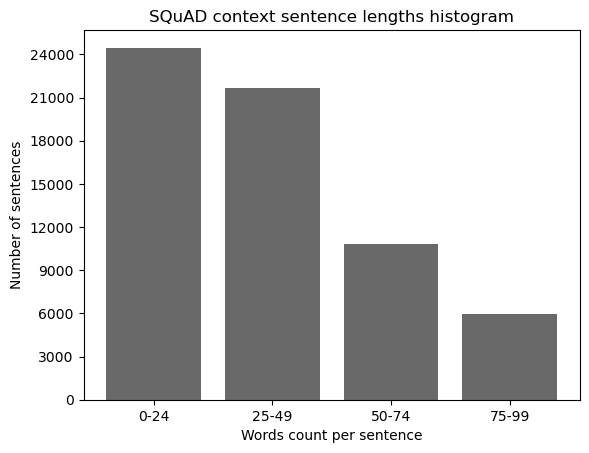

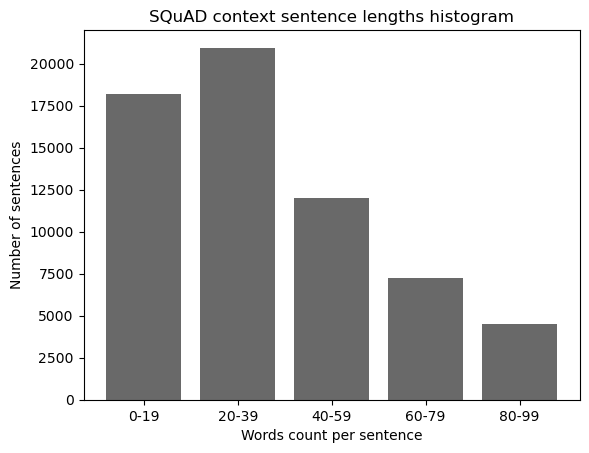

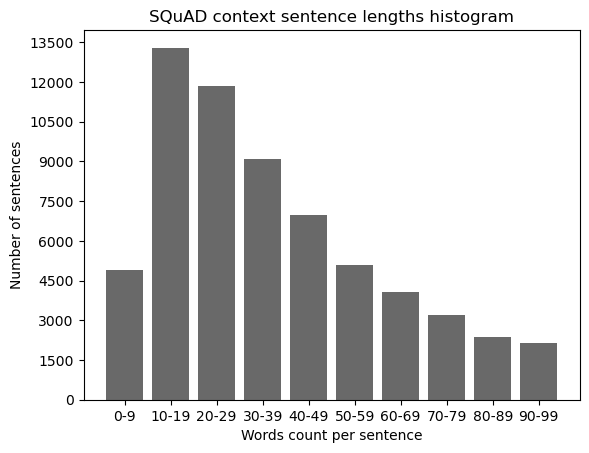

In [5]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "train_squad_context_sentence_lengths_histogram_0_700_100.png",
    figure_title="SQuAD context sentence lengths histogram",
    min_threshold=0,
    max_threshold=300,
    divider=100,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "train_squad_context_sentence_lengths_histogram_0_400_80.png",
    figure_title="SQuAD context sentence lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=25,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "train_squad_context_sentence_lengths_histogram_0_300_50.png",
    figure_title="SQuAD context sentence lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=20,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "train_squad_context_sentence_lengths_histogram_30_180_30.png",
    figure_title="SQuAD context sentence lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=10,
)

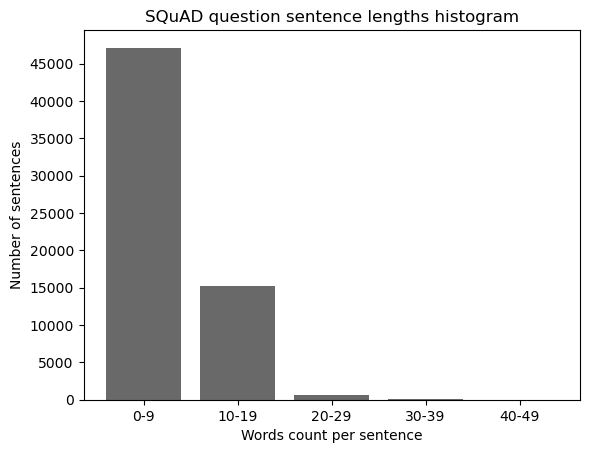

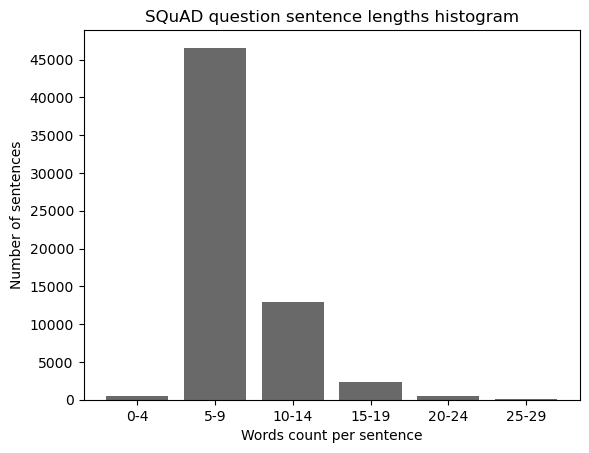

In [7]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["questions"],
    figure_path=generative_qa_paths.general_figures_dir
    / "train_squad_question_sentence_lengths_histogram_0_50_10.png",
    figure_title="SQuAD question sentence lengths histogram",
    min_threshold=0,
    max_threshold=50,
    divider=10,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["questions"],
    figure_path=generative_qa_paths.general_figures_dir
    / "train_squad_question_sentence_lengths_histogram_0_30_5.png",
    figure_title="SQuAD question sentence lengths histogram",
    min_threshold=0,
    max_threshold=30,
    divider=5,
)